# PREDICTING THE HOUSE PRICES USING XGBOOST

# Importing Necessary Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading the Data into Dataframe

In [5]:
housing = pd.read_csv('/Users/nareshchethala/My_Projects_Git/housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.describe() # To get the summary statistics of the Data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Cleaning the Data

In [8]:
#Getting the sum of the null values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
from sklearn.impute import KNNImputer

housing_df = housing.copy()

#Creating a list of numeric columns
column_list = [col for col in housing_df.columns if housing_df[col].dtype != 'object']

#extracting the list of columns that have atleast one null value
new_column_list = [col for col in housing_df.loc[:, housing_df.isnull().any()]]

#Updating the numeric columns that have null values
housing_df = housing_df[new_column_list]

# Impute the missing data

In [10]:
# initialize KNNImputer to impute missing data using machine learning
knn = KNNImputer(n_neighbors = 3)

# fit function trains the model 
knn.fit(housing_df)

# transform the data using the model
# applies the transformation model (ie knn) to data
array_Values = knn.transform(housing_df)

# convert the array values to a dataframe with the appropriate column names
housing_df = pd.DataFrame(array_Values, columns = new_column_list)

In [11]:
# We will check that there are no more null values
housing_df.isnull().sum()

total_bedrooms    0
dtype: int64

In [12]:
# overlay the imputed column over the old column with missing values

# loop through the list of columns and overlay each one
for column_name in new_column_list:
    housing[column_name] = housing_df.replace(housing[column_name],housing[column_name])

# confirm columns no longer contain null data
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# One Hot Encoding

In [13]:
#Converting the 'ocean_proximity' column to numeric values using get_dummies
housing_encoded = pd.get_dummies(data = housing, columns = ['ocean_proximity'])

housing_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


# Visualization

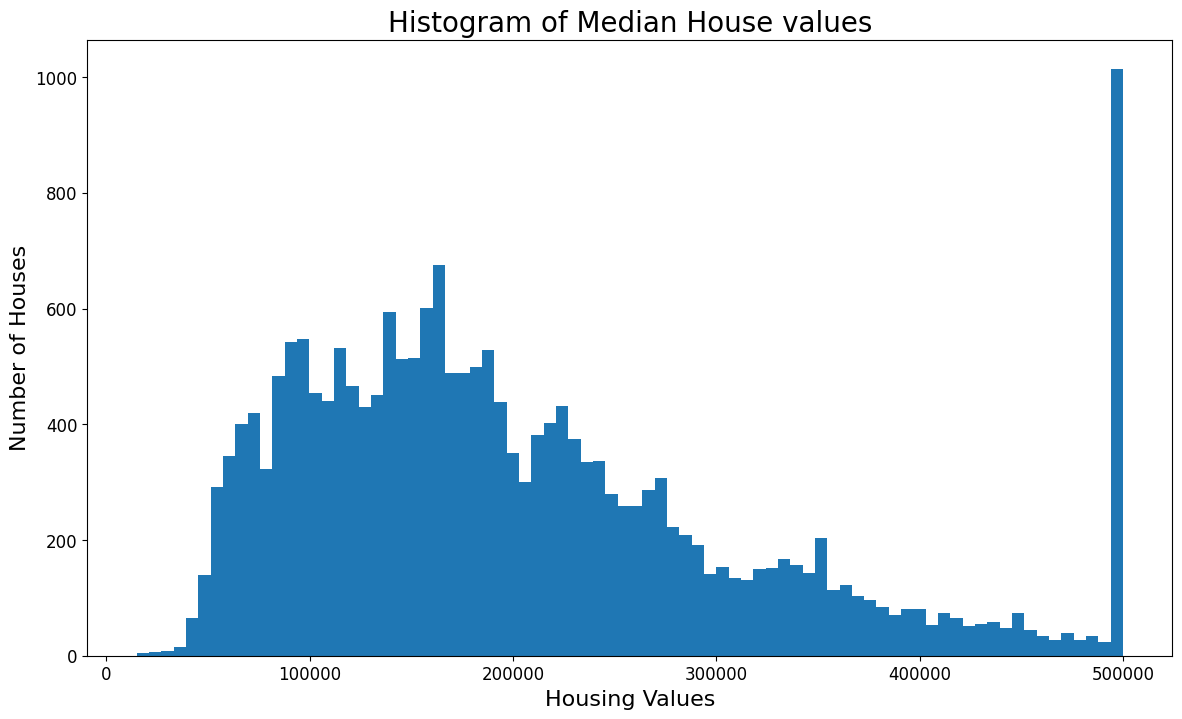

In [14]:
plt.figure(figsize=(14,8)) #this defines the size of the plot
plt.hist(housing['median_house_value'],bins = 80) #Here we define that we will be using histogram and no.of bins
plt.title('Histogram of Median House values', fontsize = 20) #This is used to set the title of the plot
plt.xlabel('Housing Values', fontsize = 16) # Sets the x axis name and font size
plt.ylabel('Number of Houses', fontsize = 16) # Sets the y axis name and font size
plt.xticks(fontsize = 12) # Sets the ticks size on x axis
plt.yticks(fontsize = 12) # Sets the ticks size on y axis
plt.show() #To show the plot

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

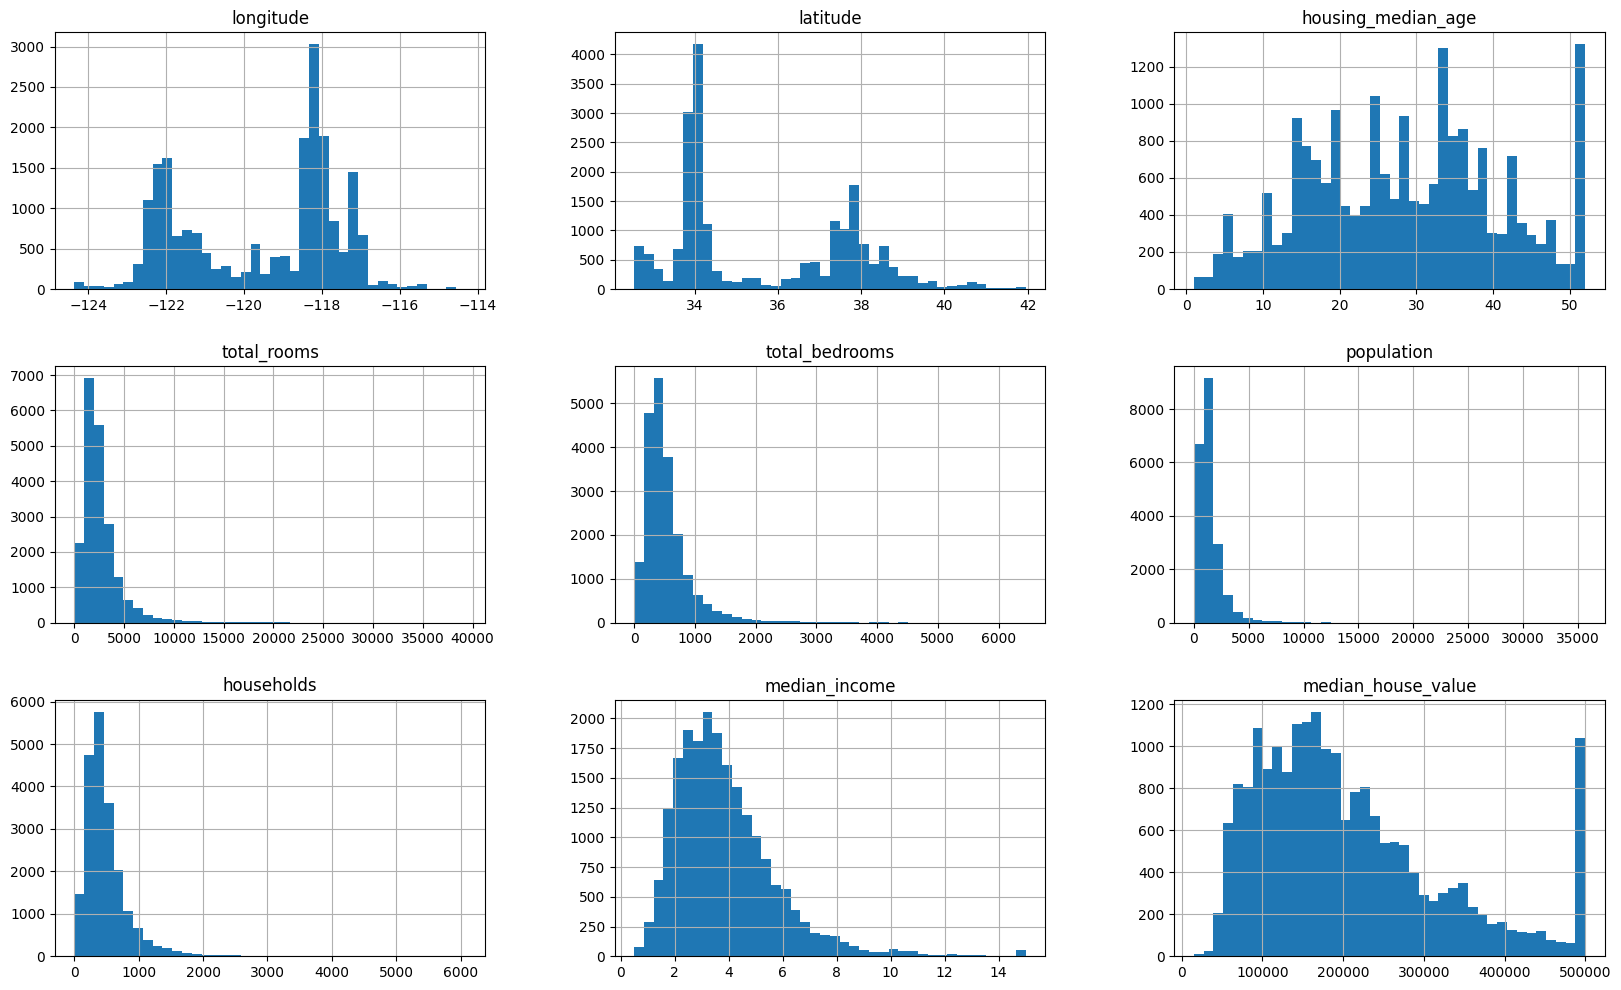

In [15]:
# Plot the Histogram to available numeric data
housing.hist(bins = 40, figsize=(20,12))

In [16]:
correlation = housing.corr(numeric_only = True) # This sets the correlation to take only numeric values
print(correlation)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069260 -0.066658           -0.318998     0.927253   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069260    0.099773    0.055310      -0.015176   
latitude                 -0.066658   -0.108785   -0.071035      -0.079809   
housing_

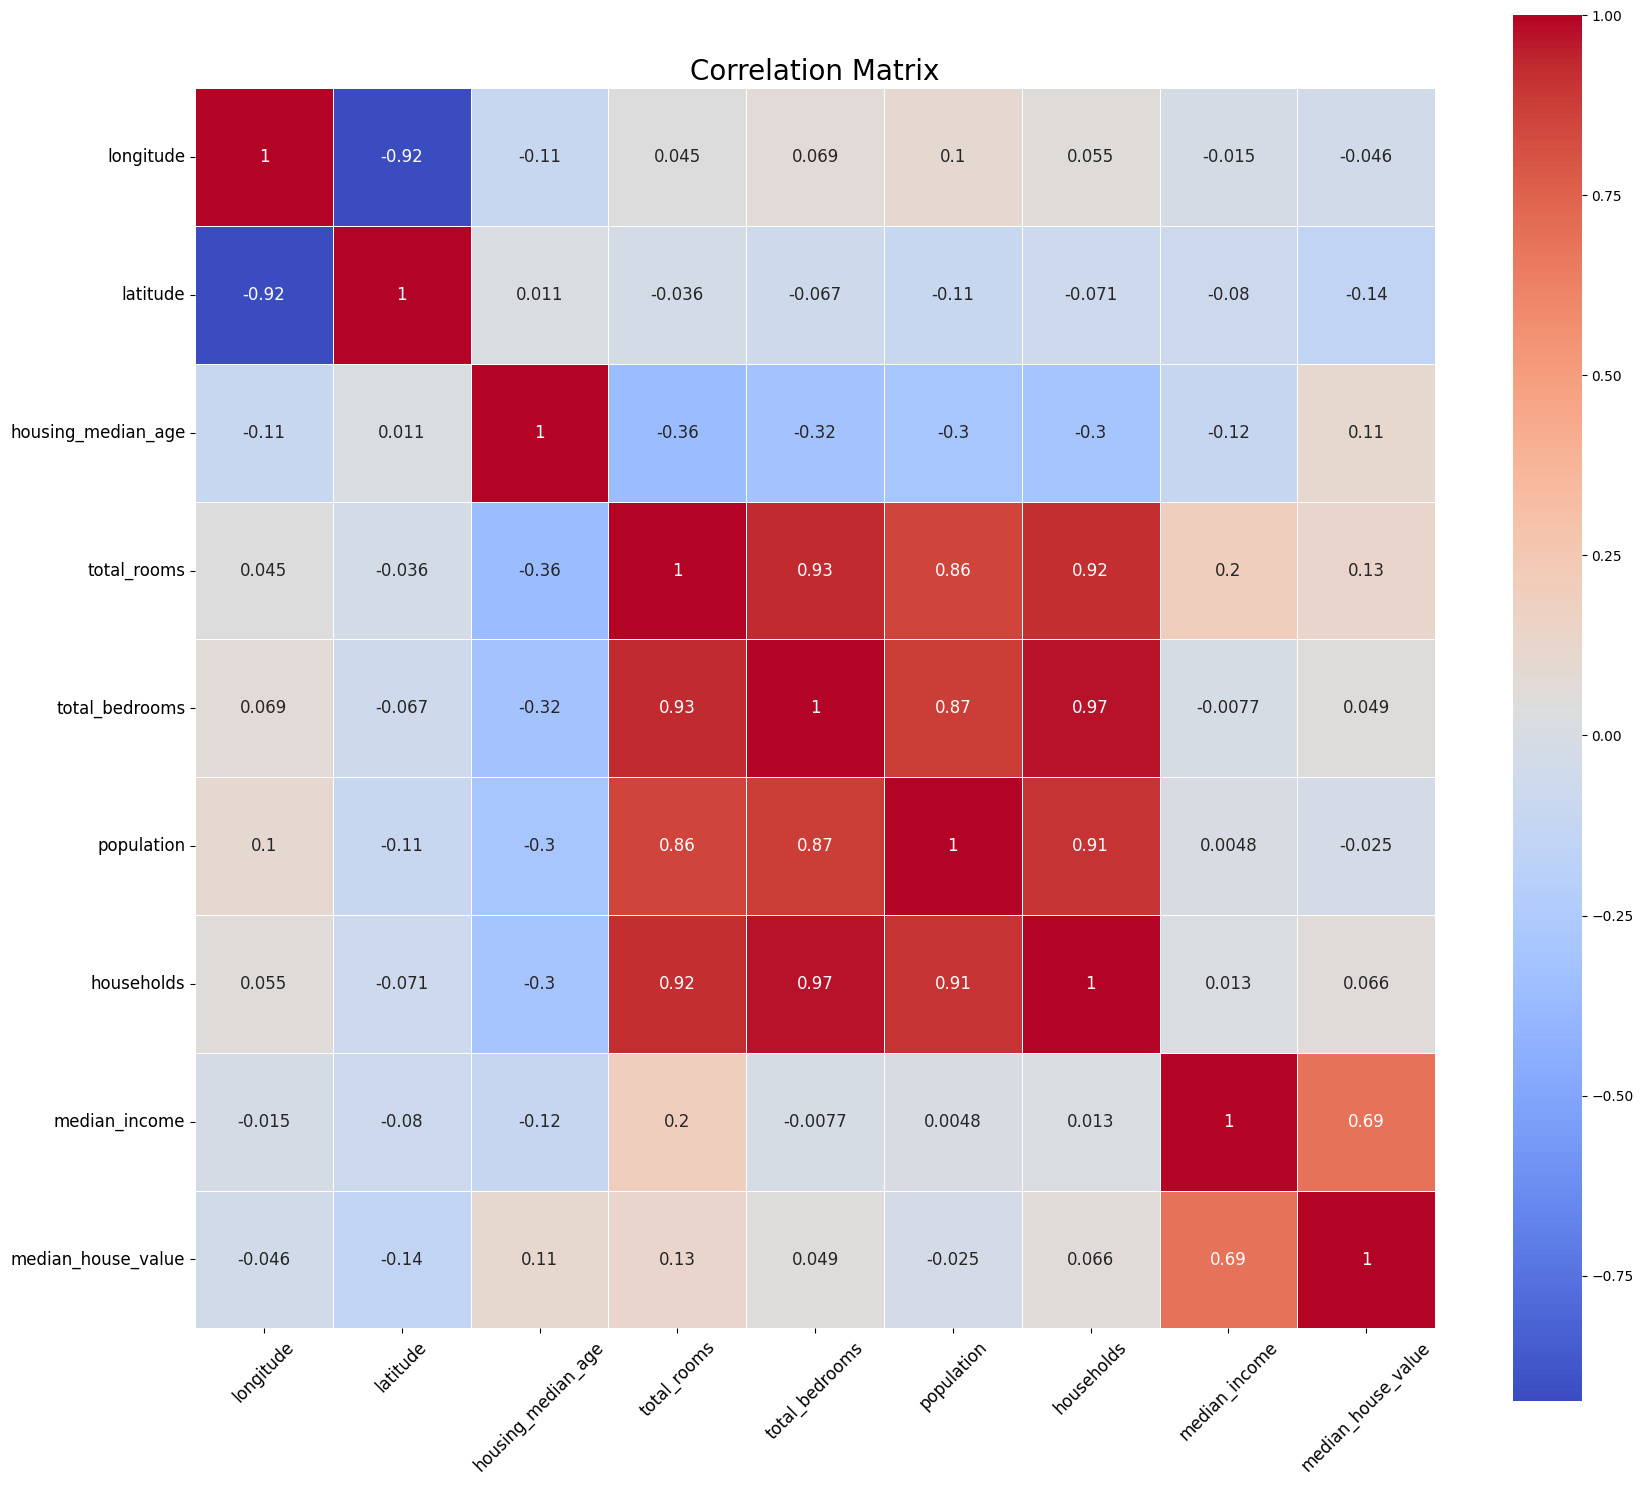

In [17]:
plt.figure(figsize=(20,18))

sns.heatmap(
    correlation,
    annot=True,
    cmap='coolwarm', # Change color map
    linewidths=0.5, # Add lines between squares
    linecolor='white', # Line color between squares
    square = True, # Make the heatmap squares
    cbar_kws={'orientation': 'vertical'},  # Position color bar vertically( you can replace it with 'horizontal' to get the color bar horizontaly
    annot_kws={'fontsize': 12} # Adjust annotation font size
)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation = 45, fontsize=12)
plt.yticks(rotation = 0, fontsize=12)
plt.show()

In [18]:
# Additionally we noted that several features (total_rooms,total_bedrooms,population,households) have very high correlation to one another, 
# so it's interesting to find out if a removal of a few of them would have any affect on the model performance
#  a new feature that is a ratio of the total rooms to households
housing_encoded['rooms_per_household'] = housing_encoded['total_rooms']/housing_encoded['households']

# a new feature that is a ratio of the total bedrooms to the total rooms 
housing_encoded['bedrooms_per_room'] = housing_encoded['total_bedrooms']/housing_encoded['total_rooms']

# a new feature that is a ratio of the population to the households 
housing_encoded['population_per_household']= housing_encoded['population']/housing_encoded['households']

# let's combine the latitude and longitude into 1
housing_encoded['coords'] = housing_encoded['longitude']/housing_encoded['latitude']

housing_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  ocean_proximity_INLAND      20640 non-null  bool   
 11  ocean_proximity_ISLAND      20640 non-null  bool   
 12  ocean_proximity_NEAR BAY    20640 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  206

In [19]:
housing_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household,coords
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False,6.984127,0.146591,2.555556,-3.226769
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False,6.238137,0.155797,2.109842,-3.228209
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False,8.288136,0.129516,2.802260,-3.229590
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False,5.817352,0.184458,2.547945,-3.229855
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False,6.281853,0.172096,2.181467,-3.229855


In [20]:
# remove total_rooms, households, total bedrooms, popluation, longitude, latitude
housing_encoded = housing_encoded.drop('total_rooms', axis=1)
housing_encoded = housing_encoded.drop('households', axis=1)
housing_encoded = housing_encoded.drop('total_bedrooms', axis=1)
housing_encoded = housing_encoded.drop('population', axis=1)
housing_encoded = housing_encoded.drop('longitude', axis=1)
housing_encoded = housing_encoded.drop('latitude', axis=1)

housing_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  float64
 1   median_income               20640 non-null  float64
 2   median_house_value          20640 non-null  float64
 3   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 4   ocean_proximity_INLAND      20640 non-null  bool   
 5   ocean_proximity_ISLAND      20640 non-null  bool   
 6   ocean_proximity_NEAR BAY    20640 non-null  bool   
 7   ocean_proximity_NEAR OCEAN  20640 non-null  bool   
 8   rooms_per_household         20640 non-null  float64
 9   bedrooms_per_room           20640 non-null  float64
 10  population_per_household    20640 non-null  float64
 11  coords                      20640 non-null  float64
dtypes: bool(5), float64(7)
memory usage: 1.2 MB


In [21]:
correlation_df = housing_encoded.corr()
print(correlation_df)

                            housing_median_age  median_income  \
housing_median_age                    1.000000      -0.119034   
median_income                        -0.119034       1.000000   
median_house_value                    0.105623       0.688075   
ocean_proximity_<1H OCEAN             0.045300       0.168876   
ocean_proximity_INLAND               -0.236645      -0.237496   
ocean_proximity_ISLAND                0.017020      -0.009228   
ocean_proximity_NEAR BAY              0.255172       0.056197   
ocean_proximity_NEAR OCEAN            0.021622       0.027344   
rooms_per_household                  -0.153277       0.326895   
bedrooms_per_room                     0.130709      -0.511031   
population_per_household              0.013191       0.018766   
coords                               -0.019926      -0.107148   

                            median_house_value  ocean_proximity_<1H OCEAN  \
housing_median_age                    0.105623                   0.045300   


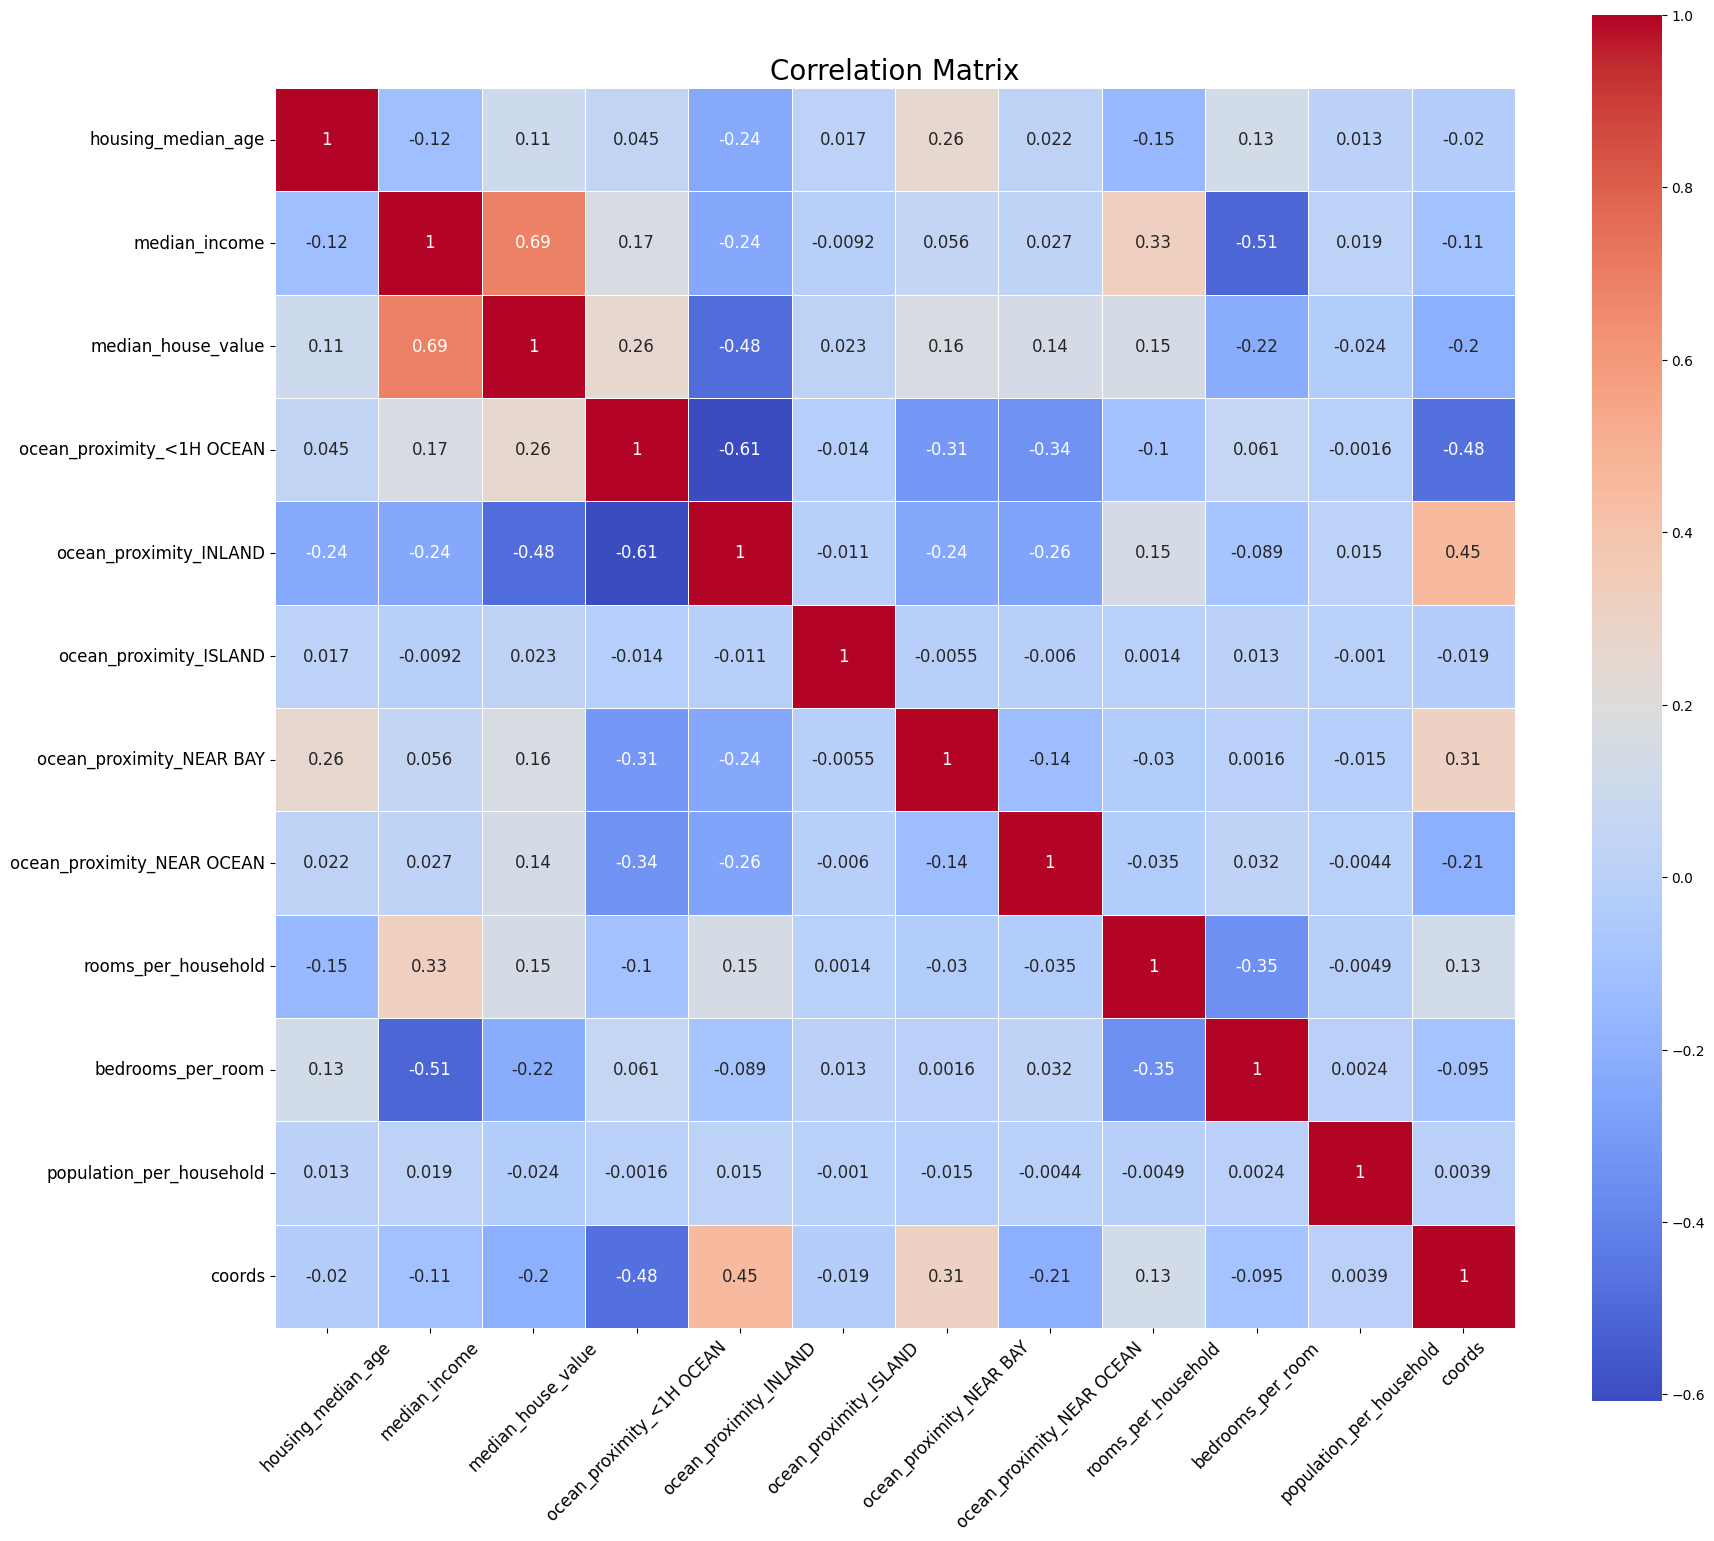

In [22]:
#Plotting the heatmap for the final modelled Data
plt.figure(figsize=(20,18))

sns.heatmap(
    correlation_df,
    annot=True,
    cmap='coolwarm', # Change color map
    linewidths=0.5, # Add lines between squares
    linecolor='white', # Line color between squares
    square = True, # Make the heatmap squares
    cbar_kws={'orientation': 'vertical'},  # Position color bar vertically( you can replace it with 'horizontal' to get the color bar horizontaly
    annot_kws={'fontsize': 12} # Adjust annotation font size
)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation = 45, fontsize=12)
plt.yticks(rotation = 0, fontsize=12)
plt.show()

# Training the Model

In [27]:
import sklearn
from sklearn.model_selection import train_test_split

# remove spaces from column names and convert all to lowercase and remove special characters as it could cause issues in the future
housing_encoded.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in housing_encoded.columns]

# Split target variable and feature variables
x = housing_encoded[['housing_median_age', 'median_income','bedrooms_per_room','population_per_household','coords','ocean_proximity__1h_ocean',
                        'ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']]
y = housing_encoded['median_house_value']

print(x)

       housing_median_age  median_income  bedrooms_per_room  \
0                    41.0         8.3252           0.146591   
1                    21.0         8.3014           0.155797   
2                    52.0         7.2574           0.129516   
3                    52.0         5.6431           0.184458   
4                    52.0         3.8462           0.172096   
...                   ...            ...                ...   
20635                25.0         1.5603           0.224625   
20636                18.0         2.5568           0.215208   
20637                17.0         1.7000           0.215173   
20638                18.0         1.8672           0.219892   
20639                16.0         2.3886           0.221185   

       population_per_household    coords  ocean_proximity__1h_ocean  \
0                      2.555556 -3.226769                      False   
1                      2.109842 -3.228209                      False   
2                      2.80

## Split the Data

In [30]:
# Splitting the data into training and testing sets in numpy arrays
# We train the model with 70% of the samples and test with the remaining 30%
# X -> array with the inputs; y -> array of the outputs
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, shuffle=True, test_size=0.2)

# Confirm how the data was split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 10)
(4128, 10)
(16512,)
(4128,)


# Using XGboost

In [23]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

In [24]:
#To get the hyper parameters of the model
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [31]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Prediction

In [32]:
y_xgb_model_predict = xgb_model.predict(x_test)

## Evaluate the model

In [34]:
eval_model = pd.DataFrame({'Actual':y_test, 'Predicted':y_xgb_model_predict})
eval_model.head()

,Actual,Predicted
20046,47700.0,44736.074219
3024,45800.0,103747.859375
15663,500001.0,381109.937500
20484,218600.0,266819.281250
9814,278000.0,225951.953125


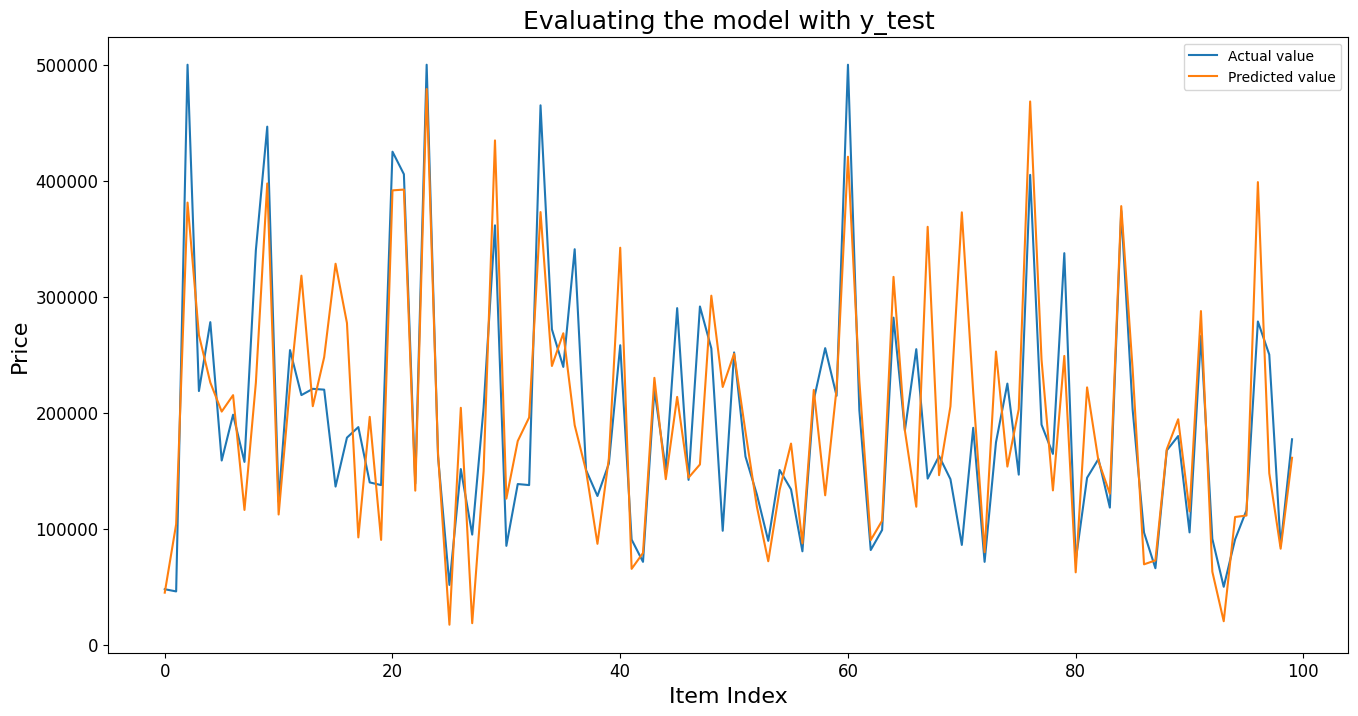

In [59]:
plt.figure(figsize=(16,8))
eval_model = eval_model.reset_index()
eval_model = eval_model.drop(['index'],axis=1)
plt.title('Evaluating the model with y_test', fontsize = 18)
plt.plot(eval_model[0:100])
plt.xlabel('Item Index', fontsize = 16)
plt.ylabel('Price', fontsize =16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(['Actual value','Predicted value'], fontsize = 10)

In [45]:
#calculating the R^2 value
from sklearn.metrics import r2_score

score = r2_score(y_test,y_xgb_model_predict)

print("R^2 - {}%".format(round(score, 2) *100))

R^2 - 76.0%


In [46]:
# Determine mean square error and root mean square error
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_xgb_model_predict)
rmse = math.sqrt(mean_squared_error(y_test, y_xgb_model_predict))

print(mse)
print(rmse)

3127722841.063885
55926.04796571885


In [47]:
# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_xgb_model_predict))

36813.57716783627


# Cross Validation

In [48]:
# We can build and score a model on multiple folds using cross-validation
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(xgb_model, x, y, scoring='r2', error_score='raise', cv=cv, n_jobs=-1, verbose=1)

#average of all the r2 scores across runs
print(scores.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.7850403811484551


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.9s finished


# Tuning Hyperparameters

In [49]:
xgb_model_2 = XGBRegressor(
    gamma=0.05,
    learning_rate=0.01,
    max_depth=6,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1,
    verbosity=1)

xgb_model_2.fit(x_train, y_train)


#run the predictions on the training and testing data
y_xgb_2_pred_test = xgb_model_2.predict(x_test)

In [50]:
# compare the actual values (ie, target) with the values predicted by the model
xgb_2_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_2_pred_test})

xgb_2_pred_test_df

,Actual,Predicted
20046,47700.0,67734.093750
3024,45800.0,96152.117188
15663,500001.0,448807.562500
20484,218600.0,253814.609375
9814,278000.0,243990.875000
...,...,...
15362,263300.0,248442.375000
16623,266800.0,232490.656250
18086,500001.0,477461.093750
2144,72300.0,84085.460938


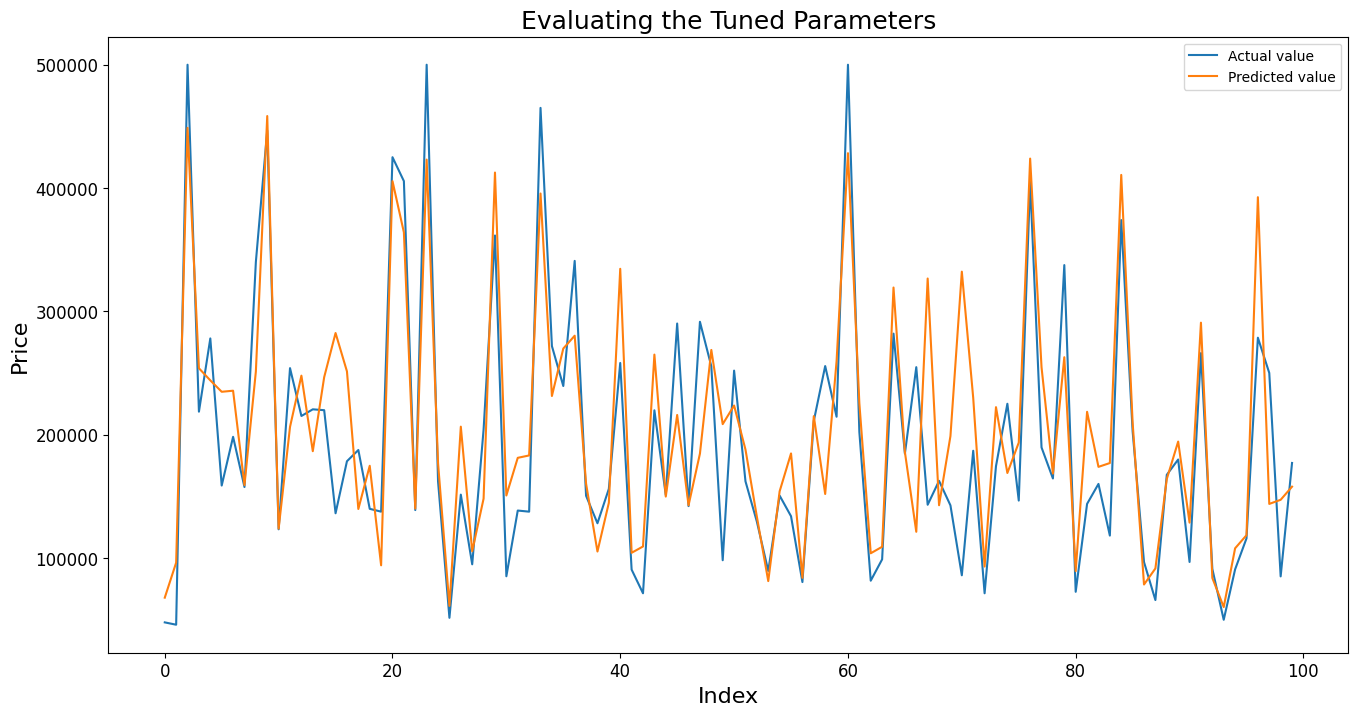

In [58]:
plt.figure(figsize=(16,8))
xgb_2_pred_test_df = xgb_2_pred_test_df.reset_index()
xgb_2_pred_test_df = xgb_2_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_2_pred_test_df[:100])
plt.title('Evaluating the Tuned Parameters', fontsize = 18)
plt.xlabel('Index',fontsize = 16)
plt.ylabel('Price', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize =12)
plt.legend(['Actual value','Predicted value'])

In [60]:
from sklearn.metrics import mean_squared_error

mse = np.sqrt(mean_squared_error(y_test, y_xgb_2_pred_test))
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 232.94


In [62]:
# Determine accuracy uisng 𝑅^2
r2_xgb_model_2_test = round(xgb_model_2.score(x_test, y_test),2)

print("R^2 Test: {}".format(r2_xgb_model_2_test))

R^2 Test: 0.78
